## Step 1 - Project Problem Statement

## Step 2 - Data Gathering

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df_calories = pd.read_csv(r"D:\python\Final Project\ML 4th Project\calories.csv")
df_calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [3]:
df_exercise = pd.read_csv(r"D:\python\Final Project\ML 4th Project\exercise.csv")
df_exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [4]:
df_calories.columns # Check column name of dataset

Index(['User_ID', 'Calories'], dtype='object')

In [5]:
df_exercise.columns # Check column name of dataset

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [6]:
df_calories.shape # shape of dataframe

(15000, 2)

In [7]:
df_exercise.shape # shape of dataframe

(15000, 8)

In [8]:
df_calories.User_ID

0        14733363
1        14861698
2        11179863
3        16180408
4        17771927
           ...   
14995    15644082
14996    17212577
14997    17271188
14998    18643037
14999    11751526
Name: User_ID, Length: 15000, dtype: int64

In [9]:
df_exercise.User_ID

0        14733363
1        14861698
2        11179863
3        16180408
4        17771927
           ...   
14995    15644082
14996    17212577
14997    17271188
14998    18643037
14999    11751526
Name: User_ID, Length: 15000, dtype: int64

In [10]:
# It clearly indicates that both columns are similar 

### Combine both dataframe

In [11]:
df = pd.concat([df_exercise,df_calories.Calories],axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


## Feature and their Units

In [12]:
df.shape # shape of dataframe

(15000, 9)

In [13]:
# User_ID doesn't affect on result so we can drop it

df.drop("User_ID", axis =1, inplace=True)

In [14]:
df.shape # shape of dataframe

(15000, 8)

## Step 3 - Data Cleaning

In [15]:
df.duplicated(keep = "first").value_counts() # check out the duplicate value in dataframe

False    14999
True         1
dtype: int64

In [16]:
# It shows True=1, it means that there is 1 duplicate row

df.drop_duplicates(keep = "first", inplace=True, ignore_index=True)

## Data Splitting

In [17]:
# split the dataset into dependent and independent feature

x = df.drop("Calories", axis = 1)
y = df["Calories"]

In [18]:
x # independent feature

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14994,female,20,193.0,86.0,11.0,92.0,40.4
14995,female,27,165.0,65.0,6.0,85.0,39.2
14996,female,43,159.0,58.0,16.0,90.0,40.1
14997,male,78,193.0,97.0,2.0,84.0,38.3


In [19]:
y # dependent feature

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14994     45.0
14995     23.0
14996     75.0
14997     11.0
14998     98.0
Name: Calories, Length: 14999, dtype: float64

In [20]:
# Split the dependent as well as independent feature as a train and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [21]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11249, 7) (3750, 7) (11249,) (3750,)


## Step 4 - EDA (Exploratory Data Analysis)

In [22]:
df.shape # Shape of Dataset

(14999, 8)

In [23]:
# df.describe()
# Check out the discription of dataset,
# it shows the count, mean and standard deviation of all features separately with 
# minimum and maximum value available in that feature

df.describe() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,42.790786,174.465831,74.967931,15.531035,95.518901,40.025488,89.542836
std,16.980401,14.258333,15.035593,8.319310,9.583542,0.779244,62.457750
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [24]:
# df.info()
# It gives the information of dataset
# It shows the non null count and datatypes of every feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14999 non-null  object 
 1   Age         14999 non-null  int64  
 2   Height      14999 non-null  float64
 3   Weight      14999 non-null  float64
 4   Duration    14999 non-null  float64
 5   Heart_Rate  14999 non-null  float64
 6   Body_Temp   14999 non-null  float64
 7   Calories    14999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [25]:
df.isna().sum() # check null value count of every feature

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [26]:
# it clearly indicates that there is no null value in dataset.

### x

In [27]:
x.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [28]:
import warnings
warnings.filterwarnings("ignore")

### Column 1 [Gender]

In [29]:
df["Gender"]

0          male
1        female
2          male
3        female
4        female
          ...  
14994    female
14995    female
14996    female
14997      male
14998      male
Name: Gender, Length: 14999, dtype: object

In [30]:
df["Gender"].value_counts()

female    7552
male      7447
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

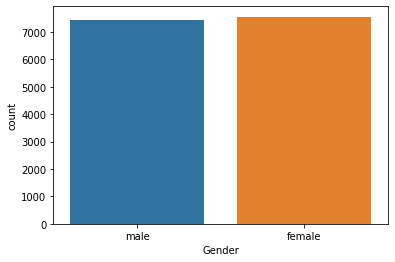

In [31]:
sns.countplot(x=df["Gender"])

In [32]:
x_train['Gender'].replace({'female':0,'male':1}, inplace=True)

In [33]:
x_test['Gender'].replace({'female':0,'male':1}, inplace=True)

In [34]:
df['Gender'].replace({'female':0,'male':1}, inplace=True)

### Column 2 [Age]

In [35]:
df['Age']

0        68
1        20
2        69
3        34
4        27
         ..
14994    20
14995    27
14996    43
14997    78
14998    63
Name: Age, Length: 14999, dtype: int64

<AxesSubplot:ylabel='Density'>

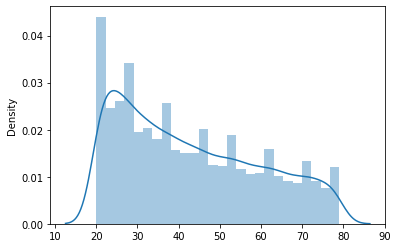

In [36]:
sns.distplot(x=df['Age'])

### Column 3 [Height]

In [37]:
df['Height']

0        190.0
1        166.0
2        179.0
3        179.0
4        154.0
         ...  
14994    193.0
14995    165.0
14996    159.0
14997    193.0
14998    173.0
Name: Height, Length: 14999, dtype: float64

<AxesSubplot:ylabel='Density'>

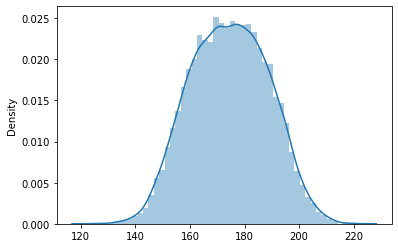

In [38]:
sns.distplot(x=df['Height'])

### Column 4 [Weight]

In [39]:
df['Weight']

0        94.0
1        60.0
2        79.0
3        71.0
4        58.0
         ... 
14994    86.0
14995    65.0
14996    58.0
14997    97.0
14998    79.0
Name: Weight, Length: 14999, dtype: float64

<AxesSubplot:ylabel='Density'>

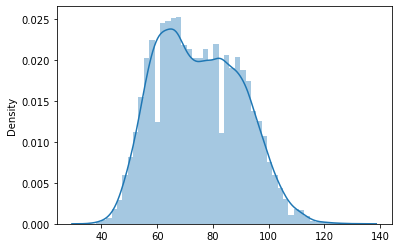

In [40]:
sns.distplot(x=df['Weight'])

### Column 5 [Duration]

In [41]:
df['Duration']

0        29.0
1        14.0
2         5.0
3        13.0
4        10.0
         ... 
14994    11.0
14995     6.0
14996    16.0
14997     2.0
14998    18.0
Name: Duration, Length: 14999, dtype: float64

<AxesSubplot:ylabel='Density'>

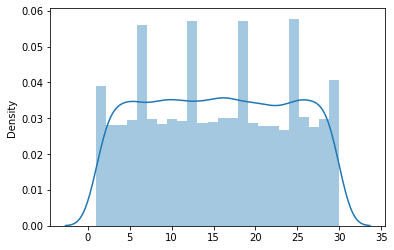

In [42]:
sns.distplot(x=df['Duration'])

### Column 6 [Heart_Rate]

In [43]:
df['Heart_Rate']

0        105.0
1         94.0
2         88.0
3        100.0
4         81.0
         ...  
14994     92.0
14995     85.0
14996     90.0
14997     84.0
14998     92.0
Name: Heart_Rate, Length: 14999, dtype: float64

<AxesSubplot:ylabel='Density'>

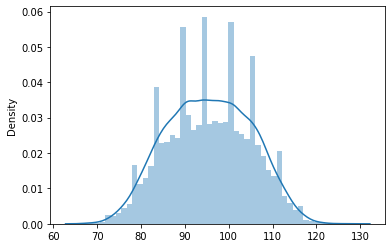

In [44]:
sns.distplot(x=df['Heart_Rate'])


### Column 7 [Body_Temp]

In [45]:
df['Body_Temp']

0        40.8
1        40.3
2        38.7
3        40.5
4        39.8
         ... 
14994    40.4
14995    39.2
14996    40.1
14997    38.3
14998    40.5
Name: Body_Temp, Length: 14999, dtype: float64

<AxesSubplot:ylabel='Density'>

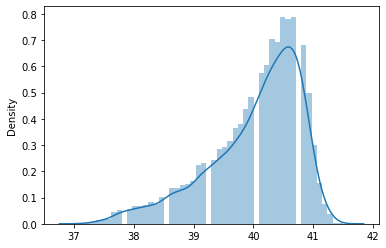

In [46]:
sns.distplot(x=df['Body_Temp'])

## Graphs

### Pairplot

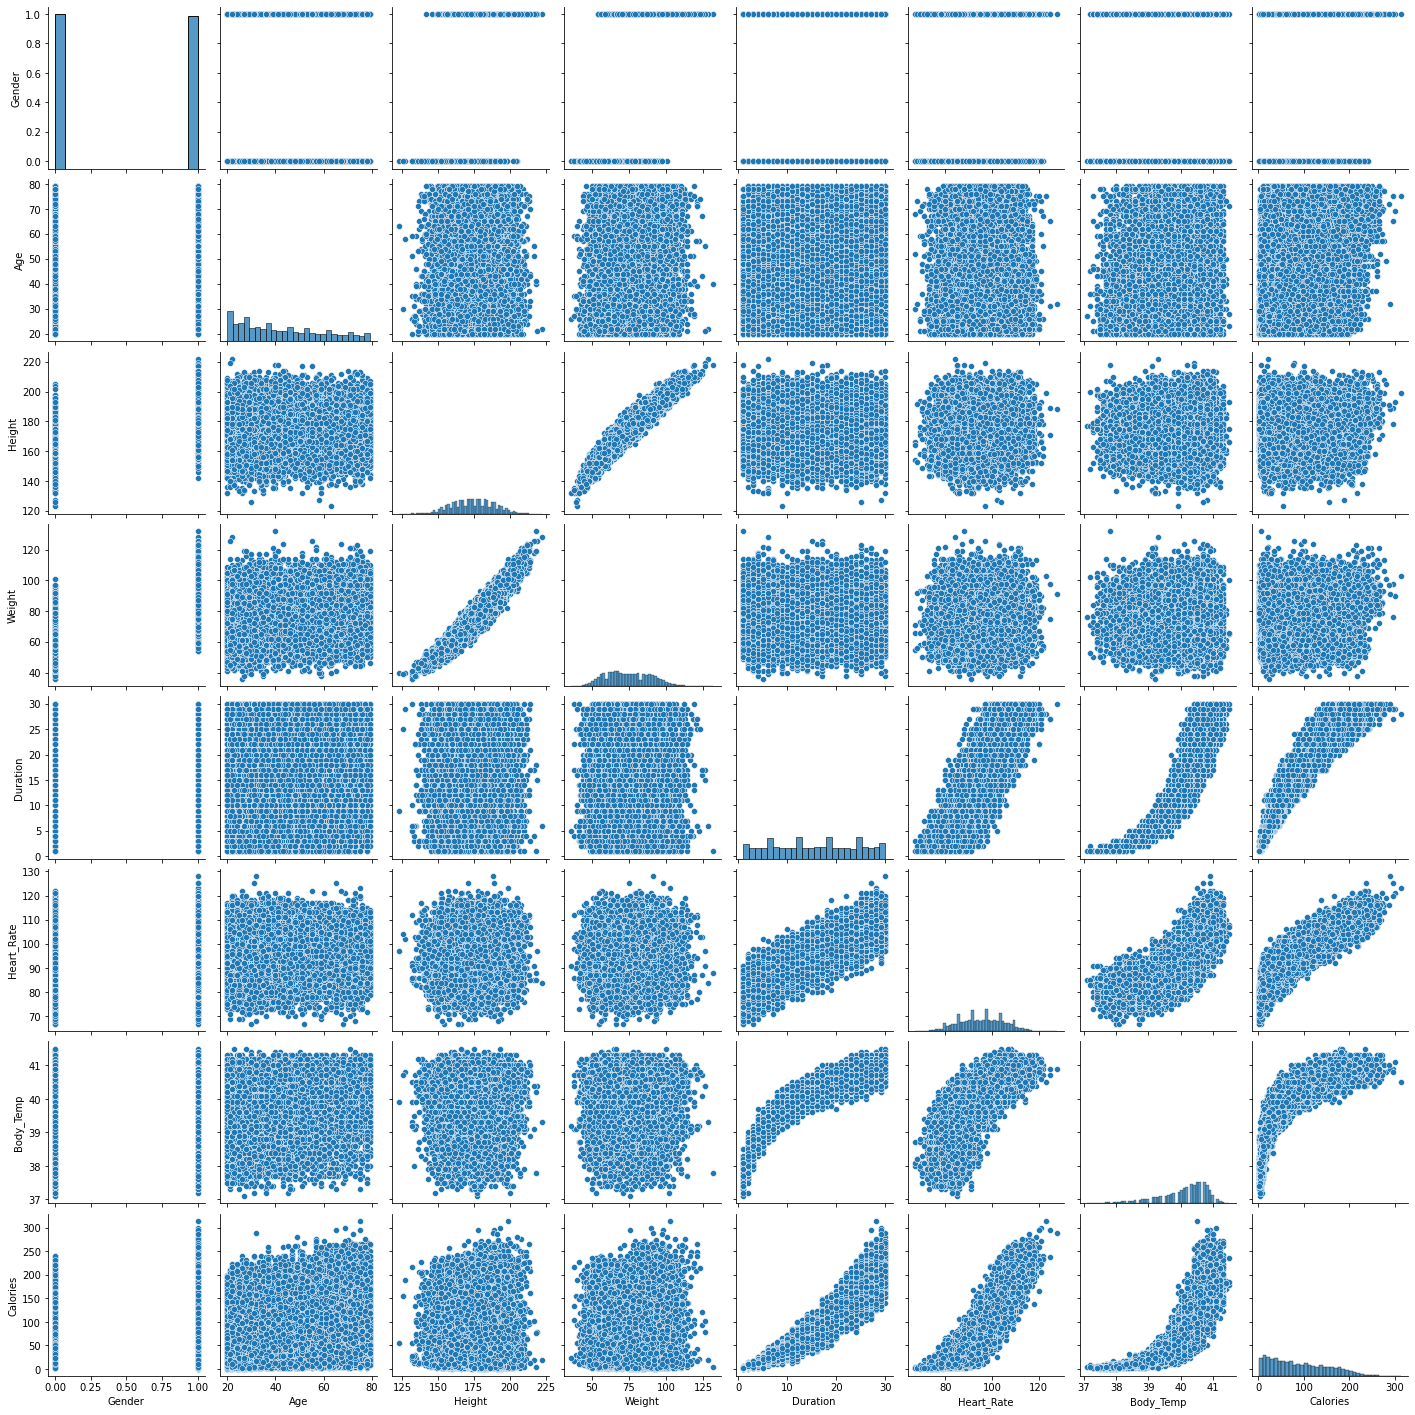

In [47]:
sns.pairplot(df)

### 2. Heatmap

<AxesSubplot:>

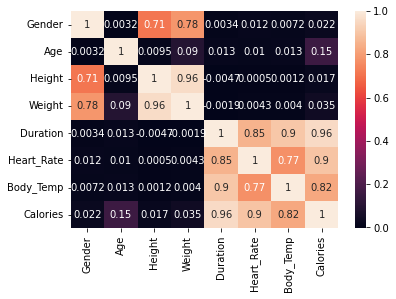

In [48]:
sns.heatmap(df.corr(), annot=True)

## Step 5 - Feature Engineering

### 5.1 Outlier Detection

## Step 6 - Feature Selection

## Step 7 - Model Training

In [49]:
def train_model(model_name, x_train,x_test,y_train,y_test):
    """This function is for model training"""    
    model_name.fit(x_train,y_train)   ### Model Training
    
    
    ############### model evaluation 
    
    ########### Test Data Evaluation 
    print('#'*50)
    print(f"TESTING DATA EVALUATION")
    y_pred_test = model_name.predict(x_test)
    r2 = r2_score(y_test,y_pred_test)
    mse = mean_squared_error(y_test,y_pred_test)
    mae = mean_absolute_error(y_test,y_pred_test)

    print(f"R- sequared Value= {r2}")
    print(f"MSE= {mse}")
    print(f"MAE= {mae}")
    
    print('#'*50)
    print(f"TRAINING DATA EVALUATION")
    print()
    print()
    ########### training Data Evaluation 
    y_pred_train = model_name.predict(x_train)
    r2 = r2_score(y_train,y_pred_train)
    mse = mean_squared_error(y_train,y_pred_train)
    mae = mean_absolute_error(y_train,y_pred_train)

    print(f"R- sequared Value= {r2}")
    print(f"MSE= {mse}")
    print(f"MAE= {mae}")
    
    return "Success"

## Step 8 - Model Evaluation

### 1. Linear Regression

In [50]:
lnr_model = LinearRegression()
train_model(lnr_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.9671396970695763
MSE= 130.66189046588232
MAE= 8.39840635799705
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 0.967212539059588
MSE= 127.06822896834785
MAE= 8.31040152888665


'Success'

### 2. K Nearest Neighbour (KNN)

In [51]:
knn_model = KNeighborsRegressor()
train_model(knn_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.9856865857462579
MSE= 56.914197333333334
MAE= 5.2830933333333325
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 0.9908934270846407
MSE= 35.29264112365544
MAE= 4.2432393990576935


'Success'

### 2.1 Hyper Parameter - K Nearest Neighbour (KNN)

In [52]:
hyp= {'n_neighbors':np.arange(3,20),'p':[1,2]}

rscv_knn = RandomizedSearchCV(knn_model,hyp, cv=7,random_state=1)
rscv_knn.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': [1, 2]},
                   random_state=1)

In [53]:
knn_model_hyp = rscv_knn.best_estimator_
knn_model_hyp.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10, p=1)

In [54]:
train_model(knn_model_hyp,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.98747524814484
MSE= 49.801968
MAE= 4.8074666666666666
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 0.9902763223256915
MSE= 37.684238598986575
MAE= 4.289359054138146


'Success'

## 3. Decision Tree

In [55]:
dt_model = DecisionTreeRegressor(random_state=2)
train_model(dt_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.9923925618002883
MSE= 30.249333333333333
MAE= 3.5
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 1.0
MSE= 0.0
MAE= 0.0


'Success'

### 3.1 Hyper Parmeter - Decision Tree

In [56]:
hyp= {'criterion': ['squared_error', 'absolute_error'],
     'max_depth':np.arange(3,10),
     'min_samples_split':np.arange(2,30),
     'min_samples_leaf':np.arange(2,10)
     }

rscv = RandomizedSearchCV(dt_model,hyp, cv= 5,random_state=1)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
                   random_state=1)

In [57]:
dt_model_hyp = rscv.best_estimator_
dt_model_hyp.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=9, min_samples_split=13, random_state=2)

In [58]:
train_model(dt_model_hyp,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.9850599195455964
MSE= 59.406
MAE= 5.358933333333334
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 0.9885790082935874
MSE= 44.26220108454085
MAE= 4.542892701573473


'Success'

### 4. Random Forest

In [59]:
rf_model = RandomForestRegressor(random_state=5)
train_model(rf_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.9976557068801916
MSE= 9.321574773333333
MAE= 1.8160693333333333
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 0.999688910321215
MSE= 1.20563207396213
MAE= 0.6864503511423238


'Success'

## 5. Support Vector Machine

In [60]:
svr_model = SVR()
train_model(svr_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.936193527675046
MSE= 253.71264274677733
MAE= 10.853044171266355
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 0.93628794877485
MSE= 246.91687861508294
MAE= 10.833601456330108


'Success'

## Final Model Seelection

In [61]:
train_model(dt_model_hyp,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
R- sequared Value= 0.9850599195455964
MSE= 59.406
MAE= 5.358933333333334
##################################################
TRAINING DATA EVALUATION


R- sequared Value= 0.9885790082935874
MSE= 44.26220108454085
MAE= 4.542892701573473


'Success'

In [62]:
import pickle
model = pickle.dump(dt_model_hyp,open('model.pkl','wb'))

## User Define Function

In [63]:
def prediction(user_input_data):

    result = dt_model_hyp.predict(user_input_data)
    return (f"Calories Burn = {result[0]}")

In [64]:
user_input_data = x_test.head(1)
user_input_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11908,1,79,172.0,77.0,24.0,107.0,40.7


In [65]:
prediction(user_input_data)

'Calories Burn = 195.0'

In [66]:
df.iloc[11908]

Gender          1.0
Age            79.0
Height        172.0
Weight         77.0
Duration       24.0
Heart_Rate    107.0
Body_Temp      40.7
Calories      202.0
Name: 11908, dtype: float64

In [67]:
(195/202)*100

96.53465346534654

In [68]:
user_input_data = x_test.head(2)
user_input_data.tail(1)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
10508,0,21,160.0,57.0,3.0,91.0,38.7


In [69]:
prediction(user_input_data.tail(1))

'Calories Burn = 13.0'

In [70]:
df.iloc[10508]

Gender          0.0
Age            21.0
Height        160.0
Weight         57.0
Duration        3.0
Heart_Rate     91.0
Body_Temp      38.7
Calories       13.0
Name: 10508, dtype: float64

In [71]:
user_input_data = x_test.head(3)
user_input_data.tail(1)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9193,1,69,189.0,92.0,18.0,99.0,40.3


In [72]:
prediction(user_input_data.tail(1))

'Calories Burn = 128.0'

In [73]:
df.iloc[9193]

Gender          1.0
Age            69.0
Height        189.0
Weight         92.0
Duration       18.0
Heart_Rate     99.0
Body_Temp      40.3
Calories      127.0
Name: 9193, dtype: float64

In [74]:
x_test.shape

(3750, 7)

In [75]:
columns = x_test.columns.to_list()
print(len(columns))

7


In [76]:
columns_dict = {"col_name": columns}
columns_dict

{'col_name': ['Gender',
  'Age',
  'Height',
  'Weight',
  'Duration',
  'Heart_Rate',
  'Body_Temp']}

In [77]:
import json

In [78]:
with open('columns_name.json','w') as json_file:
    json.dump(columns_dict,json_file)